In [1]:
import os
os.sys.path.append('..')

In [2]:
import warnings
warnings.simplefilter("ignore")

# autoreload import your package
%load_ext autoreload
%autoreload 2

In [3]:
from loguru import logger
logger.remove()
logger.add(os.sys.stdout, level="ERROR", colorize=True, format="<level>{time} | {message}</level>")
# import_dir(ta_dir, verbose=False)
warnings.simplefilter("ignore")

# Args

In [4]:
from run import set_seed, get_args, Exp_Main

In [5]:
# mimic cli args to avoid code duplication
argv = """python -u run.py \
  --root_path ../dataset/stocks/ \
  --data_path OXY_2019.csv.gz \
  --checkpoints ./checkpoints/ \
  --model_id Exchange \
  --model ETSformer \
  --data custom \
  --features M \
  --seq_len 128 \
  --pred_len 48 \
  --e_layers 2 \
  --d_layers 2 \
  --enc_in 12 \
  --dec_in 12 \
  --c_out 1 \
  --des 'Exp' \
  --K 0 \
  --learning_rate 1e-3 \
  --target RSMKs_18_144_72_2ref_2ref \
  --itr 1
"""
argv = argv.replace("\\n", "").split()[3:]
args = get_args(argv)
args

Args in experiment:
Namespace(K=0, activation='sigmoid', batch_size=32, c_out=1, checkpoints='./checkpoints/', d_ff=2048, d_layers=2, d_model=512, damping_learning_rate=0, data='custom', data_path='OXY_2019.csv.gz', dec_in=12, des="'Exp'", devices='0,1,2,3', dropout=0.2, e_layers=2, embed='timeF', enc_in=12, features='M', freq='h', gpu=0, itr=1, label_len=0, learning_rate=0.001, lradj='exponential_with_warmup', min_lr=1e-30, model='ETSformer', model_id='Exchange', n_heads=8, num_workers=10, optim='adam', output_attention=False, patience=5, pred_len=48, root_path='../dataset/stocks/', seq_len=128, smoothing_learning_rate=0, std=0.2, target='RSMKs_18_144_72_2ref_2ref', train_epochs=15, use_gpu=True, use_multi_gpu=False, warmup_epochs=3)


Namespace(K=0, activation='sigmoid', batch_size=32, c_out=1, checkpoints='./checkpoints/', d_ff=2048, d_layers=2, d_model=512, damping_learning_rate=0, data='custom', data_path='OXY_2019.csv.gz', dec_in=12, des="'Exp'", devices='0,1,2,3', dropout=0.2, e_layers=2, embed='timeF', enc_in=12, features='M', freq='h', gpu=0, itr=1, label_len=0, learning_rate=0.001, lradj='exponential_with_warmup', min_lr=1e-30, model='ETSformer', model_id='Exchange', n_heads=8, num_workers=10, optim='adam', output_attention=False, patience=5, pred_len=48, root_path='../dataset/stocks/', seq_len=128, smoothing_learning_rate=0, std=0.2, target='RSMKs_18_144_72_2ref_2ref', train_epochs=15, use_gpu=True, use_multi_gpu=False, warmup_epochs=3)

In [6]:
import torch

In [7]:

Exp = Exp_Main

for ii in range(args.itr):
    print(ii)
    set_seed(ii)
    # setting record of experiments
    setting = '{}_{}_{}_ft{}_sl{}_pl{}_dm{}_nh{}_el{}_dl{}_df{}_K{}_lr{}_{}_{}'.format(
        args.model_id,
        args.model,
        args.data,
        args.features,
        args.seq_len,
        args.pred_len,
        args.d_model,
        args.n_heads,
        args.e_layers,
        args.d_layers,
        args.d_ff,
        args.K,
        args.learning_rate,
        args.des, ii)

#     if os.path.exists(os.path.join(args.checkpoints, setting)):
#         print('skipping exists')
#         continue

    exp = Exp(args)  # set experiments
    print('>>>>>>>start training : {}>>>>>>>>>>>>>>>>>>>>>>>>>>'.format(setting))
    exp.train(setting)

    print('>>>>>>>testing : {}<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<'.format(setting))
    exp.test(setting, data='val')
    exp.test(setting, data='test')

    torch.cuda.empty_cache()


0
Use GPU: cuda:0
>>>>>>>start training : Exchange_ETSformer_custom_ftM_sl128_pl48_dm512_nh8_el2_dl2_df2048_K0_lr0.001_'Exp'_0>>>>>>>>>>>>>>>>>>>>>>>>>>
train 37203
val 5294
test 10632


  0%|          | 0/15 [00:00<?, ?epoch/s]

train:   0%|          | 0/1162 [00:00<?, ?it/s]

Epoch: 1 cost time: 33.52427625656128
Epoch: 1, Steps: 1162 | Train Loss: 0.2760431 Vali Loss: 0.0907234 Test Loss: 0.1297583
Validation loss decreased (inf --> 0.090723).  Saving model ...
Updating learning rate to 0.00025


train:   0%|          | 0/1162 [00:00<?, ?it/s]

Epoch: 2 cost time: 33.673935413360596
Epoch: 2, Steps: 1162 | Train Loss: 0.2290657 Vali Loss: 0.0410995 Test Loss: 0.0603366
Validation loss decreased (0.090723 --> 0.041100).  Saving model ...
Updating learning rate to 0.0005


train:   0%|          | 0/1162 [00:00<?, ?it/s]

KeyboardInterrupt: 

In [ ]:
# %debug

# Plot

In [31]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [9]:
setting

"Exchange_ETSformer_custom_ftM_sl128_pl48_dm512_nh8_el2_dl2_df2048_K0_lr0.001_'Exp'_0"

In [10]:
ds, dl = exp._get_data('test')

test 10632


In [22]:
preds, trues = exp.test(setting, data='test')

test 10632
loading model


  0%|          | 0/332 [00:00<?, ?it/s]

test shape: (332, 32, 48, 1) (332, 32, 48, 1)
test shape: (10624, 48, 1) (10624, 48, 1)
mse:0.060336604714393616, mae:0.16866351664066315


In [148]:
# i=50
# (batch_x, batch_y, batch_x_mark, batch_y_mark)  = ds[i]
# [x.shape for x in ds[10]]

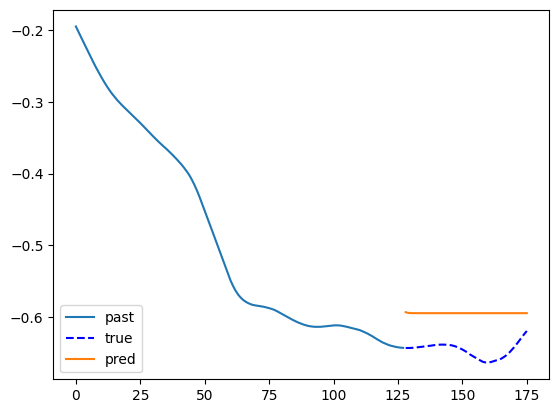

In [147]:
(batch_x, batch_y, batch_x_mark, batch_y_mark)  = ds[i]
l1 = batch_x.shape[0]
l2 = batch_y.shape[0]
plt.plot(range(l1), batch_x[:, -1], label='past')
plt.plot(range(l1, l1+l2), batch_y[:, -1], color='blue', ls='--', label='true')
plt.plot(range(l1, l1+l2), preds[i], label='pred');
plt.legend(loc='lower left')

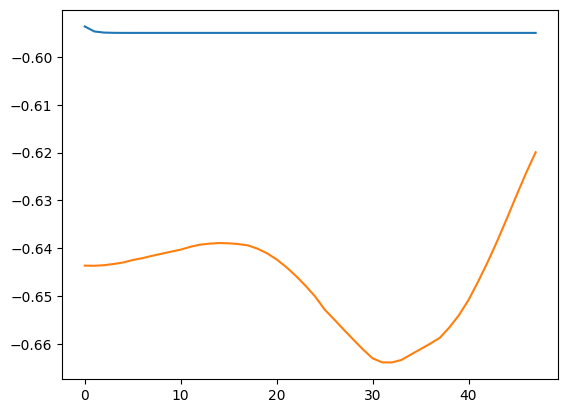

In [23]:
plt.plot(preds[i]);
plt.plot(trues[i]);

In [24]:
ds.index

42767    2020-09-01 16:35:00
42768    2020-09-01 16:40:00
42769    2020-09-01 16:45:00
42770    2020-09-01 16:50:00
42771    2020-09-01 16:55:00
                ...         
53393    2020-12-31 17:35:00
53394    2020-12-31 18:30:00
53395    2020-12-31 19:15:00
53396    2020-12-31 19:20:00
53397    2020-12-31 19:55:00
Name: date, Length: 10631, dtype: object

In [134]:
(batch_x, batch_y, batch_x_mark, batch_y_mark)  = ds2[i]
batch_x[-1]

array([ 1.25000000e+01,  3.52880000e+02,  3.54100000e+01,  7.80450949e-01,
        9.82722730e-01,  5.37977462e-01,  8.07709812e-02, -2.64457225e-01,
       -1.43769087e-01,  4.38652607e-01,  1.86131098e-01, -3.70741650e+00])

# TODO check index

In [112]:
f = ds.root_path + '/' + ds.data_path
df = pd.read_csv(f).set_index('date', drop=False)
df = df[ds.cols[1:]]
# df[:] = ds.scaler.transform(df.values)
df
# df

,close,ref_close,sec_close,RVOLs_50_12_2ref_2ref,MACDVs_3_10_9_2ref_2ref,MACDVs_8_24_9_2ref_2ref,RRVOLs_50_12_2ref_2ref,RSMKs_3_24_12_2ref_2ref,RSMKs_128_8_4_2ref_2ref,RRSs_12_12_12_2ref_2ref,VRRSs_5_21_12_2ref_2ref,RSMKs_18_144_72_2ref_2ref
date,,,,,,,,,,,,
2019-01-02 07:00:00,60.7500,246.3900,56.70,0.634561,0.228822,0.749770,-0.081572,0.754948,0.041974,0.452882,0.094300,-0.141763
2019-01-02 09:30:00,60.2000,246.3000,56.30,0.619485,-0.138271,0.516611,-0.159545,0.690752,0.037310,0.201226,-0.050731,-0.127774
2019-01-02 09:35:00,59.8500,246.5200,56.36,0.689500,-0.535564,0.191501,-0.104752,0.553376,0.027199,-0.217425,-0.069932,-0.117113
2019-01-02 09:40:00,60.0600,246.9001,56.70,0.746596,-0.803242,-0.130051,-0.070761,0.402911,0.015511,-0.473000,-0.089949,-0.109966
2019-01-02 09:45:00,60.2350,247.1400,56.69,0.701637,-0.936439,-0.409001,-0.130581,0.263664,0.003868,-0.679096,-0.096488,-0.105561
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 17:35:00,17.3300,374.2100,37.90,0.706492,-0.129955,-0.551704,0.197178,-0.842459,-0.216290,-3.579407,-0.088556,-1.118991
2020-12-31 18:30:00,17.3200,374.4000,37.96,0.615936,-0.147461,-0.538942,0.174563,-0.803874,-0.213881,-3.258388,-0.075389,-1.179880
2020-12-31 19:15:00,17.3600,374.3900,37.95,0.605291,-0.105155,-0.508192,0.226633,-0.756699,-0.210656,-2.735903,-0.063731,-1.239256


In [129]:
from data_provider.data_loader import Dataset_Custom
ds2 = Dataset_Custom(
    ds.root_path,
    flag="test",
#     size=ds.size,
    features=ds.features,
    data_path=ds.data_path,
    target=ds.target,
    scale=False,
    timeenc=ds.timeenc,
    freq=ds.freq
)

(batch_x, batch_y, batch_x_mark, batch_y_mark)  = ds2[i]
batch_x[-1]

array([ 1.25000000e+01,  3.52880000e+02,  3.54100000e+01,  7.80450949e-01,
        9.82722730e-01,  5.37977462e-01,  8.07709812e-02, -2.64457225e-01,
       -1.43769087e-01,  4.38652607e-01,  1.86131098e-01, -3.70741650e+00])

In [130]:
dt = ds2.index.iloc[i]
df.loc[dt]

close                         12.720000
ref_close                    350.630000
sec_close                     35.720000
RVOLs_50_12_2ref_2ref          0.253561
MACDVs_3_10_9_2ref_2ref       -0.258574
MACDVs_8_24_9_2ref_2ref       -0.449367
RRVOLs_50_12_2ref_2ref        -0.148139
RSMKs_3_24_12_2ref_2ref       -0.424728
RSMKs_128_8_4_2ref_2ref       -0.150821
RRSs_12_12_12_2ref_2ref       -4.458638
VRRSs_5_21_12_2ref_2ref       -0.035404
RSMKs_18_144_72_2ref_2ref     -2.292316
Name: 2020-09-01 08:05:00, dtype: float64

In [131]:
df.loc[:dt].tail(10)

,close,ref_close,sec_close,RVOLs_50_12_2ref_2ref,MACDVs_3_10_9_2ref_2ref,MACDVs_8_24_9_2ref_2ref,RRVOLs_50_12_2ref_2ref,RSMKs_3_24_12_2ref_2ref,RSMKs_128_8_4_2ref_2ref,RRSs_12_12_12_2ref_2ref,VRRSs_5_21_12_2ref_2ref,RSMKs_18_144_72_2ref_2ref
date,,,,,,,,,,,,
2020-09-01 07:05:00,12.78,351.02,35.71,0.193038,0.139308,-0.167503,-0.457840,-0.120366,-0.097117,-1.113143,-0.057836,-2.129797
2020-09-01 07:15:00,12.72,350.83,35.76,0.172246,0.054992,-0.167238,-0.389511,-0.147534,-0.104186,-1.869118,-0.087983,-2.147435
2020-09-01 07:20:00,12.70,350.80,35.70,0.185312,-0.078002,-0.211485,-0.306203,-0.198667,-0.115042,-2.702641,-0.110004,-2.165641
2020-09-01 07:25:00,12.72,350.70,35.65,0.192109,-0.164477,-0.258804,-0.284154,-0.255096,-0.123646,-3.397736,-0.104798,-2.183736
2020-09-01 07:30:00,12.73,350.50,35.66,0.225091,-0.201191,-0.295878,-0.229570,-0.285606,-0.132584,-3.782116,-0.069555,-2.201911
2020-09-01 07:40:00,12.72,350.56,35.67,0.192338,-0.232440,-0.334591,-0.414401,-0.320162,-0.140044,-4.080456,-0.062384,-2.220361
2020-09-01 07:45:00,12.71,350.54,35.67,0.172743,-0.274229,-0.380497,-0.416034,-0.356426,-0.145459,-4.530481,-0.056956,-2.239216
2020-09-01 07:50:00,12.72,350.49,35.70,0.148786,-0.289147,-0.417921,-0.358402,-0.382376,-0.147811,-4.467765,-0.033833,-2.257165
2020-09-01 08:00:00,12.72,350.63,35.71,0.231278,-0.276805,-0.436961,-0.233196,-0.404503,-0.150513,-4.532557,-0.031680,-2.275121


In [132]:
df.loc[dt:].head(10)

,close,ref_close,sec_close,RVOLs_50_12_2ref_2ref,MACDVs_3_10_9_2ref_2ref,MACDVs_8_24_9_2ref_2ref,RRVOLs_50_12_2ref_2ref,RSMKs_3_24_12_2ref_2ref,RSMKs_128_8_4_2ref_2ref,RRSs_12_12_12_2ref_2ref,VRRSs_5_21_12_2ref_2ref,RSMKs_18_144_72_2ref_2ref
date,,,,,,,,,,,,
2020-09-01 08:05:00,12.7200,350.63,35.7200,0.253561,-0.258574,-0.449367,-0.148139,-0.424728,-0.150821,-4.458638,-0.035404,-2.292316
2020-09-01 08:10:00,12.7100,350.65,35.7100,0.377474,-0.257495,-0.464872,-0.056481,-0.439078,-0.149315,-3.802018,-0.059968,-2.308917
2020-09-01 08:15:00,12.7200,350.67,35.7000,0.333210,-0.238231,-0.470690,-0.050828,-0.429932,-0.147446,-3.118936,-0.048271,-2.325404
2020-09-01 08:20:00,12.7400,350.69,35.7000,0.332308,-0.170788,-0.448436,-0.034869,-0.433898,-0.145277,-2.634433,0.017789,-2.340819
2020-09-01 08:25:00,12.7000,350.75,35.6900,0.412416,-0.177005,-0.446322,0.035903,-0.458732,-0.144407,-2.273931,-0.074174,-2.357595
2020-09-01 08:45:00,12.7200,350.90,35.7200,0.396500,-0.163743,-0.437072,0.053250,-0.491988,-0.143145,-1.893402,-0.078288,-2.374942
2020-09-01 08:50:00,12.7200,350.65,35.7300,0.624533,-0.144462,-0.424847,0.224395,-0.536655,-0.141796,-1.570535,-0.055490,-2.392740
2020-09-01 08:55:00,12.7000,350.32,35.7000,0.612150,-0.167709,-0.428442,0.164079,-0.588308,-0.140547,-1.379467,-0.056093,-2.411249
2020-09-01 09:00:00,12.6702,350.00,35.6500,0.801189,-0.253867,-0.463291,0.362784,-0.631686,-0.140254,-1.113389,-0.096814,-2.430535
